#Testing the code (add collisions, change where light rays appear and scale of plot based on function)

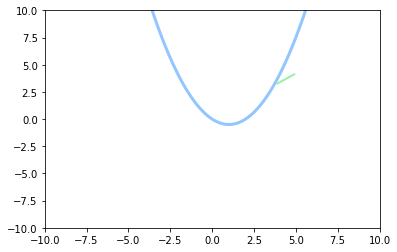

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

from matplotlib import rc
rc('animation', html='jshtml')

'''
snells law n1*sin(theta1) = n2*sin(theta2)
'''

#arguments for the functions
a = 0.5 #ax^2
b = 0 #bx
c = 0 #c
T = -20 * np.pi / 180 #light ray angle
n = 9 #number of light rays

# initializing plots
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
# initializing parabola
line1, = ax.plot([], [], lw=3)
# initializing rays of light
line2, = ax.plot([], [], lw=2)

#Defining the animation
def init():
  # parabola
  x = np.linspace(-10, 10, 100)
  y = a * (x ** 2) + b * x + c
  # set lines
  line1.set_data(x, y)
  return line1,
  line2.set_data([],[])
  return line2,

def animate(i):
  # rays of light
    y = np.linspace(1,2,100) - (i * 0.1)
    x = (y / np.tan((3 * np.pi / 2) + T))
  # parabola boundaries
    m = min(y)
    d = (m / np.tan((3 * np.pi / 2) + T))
    p = a * (d ** 2) + b * d + c
  # collision check
    while m >= p:
      global f
      f = m
      global g
      g = d
      line2.set_data(x, y)
      return line2,
    else:
      ###linspace dynamic length (same length of 1)
      ###(x +, x - [determine direction])
      if T > 0:
        if (-b / 2 * a) >= g:
          w = np.linspace(g, g-1, 100) + (i * 0.1)
          z = (-1 * (1 / (np.tan(2 * (np.arctan(-1 * ((2 * a * f) + b)) + T)))) * (w - g)) + f
          line2.set_data(w, z)
          return line2,
        elif (-b / 2 * a) < g:
          w = np.linspace(g, g+1, 100) - (i * 0.1)
          z = (-1 * (1 / (np.tan(2 * (np.arctan(-1 * ((2 * a * f) + b)) - T)))) * (w - g)) + f
          line2.set_data(w, z)
          return line2,
      elif T < 0:
        if (-b / 2 * a) <= g:
          w = np.linspace(g, g+1, 100) - (i * 0.1)
          z = (-1 * (1 / (np.tan(2 * (np.arctan(-1 * ((2 * a * f) + b)) + T)))) * (w - g)) + f
          line2.set_data(w, z)
          return line2,
        elif (-b / 2 * a) > g:
          w = np.linspace(g, g-1, 100) + (i * 0.1)
          z = (-1 * (1 / (np.tan(2 * (np.arctan(-1 * ((2 * a * f) + b)) - T)))) * (w - g)) + f
          line2.set_data(w, z)
          return line2,
      else:
        if (-b / 2 * a) < g:
          w = np.linspace(g, g+1, 100) - (i * 0.1)
          z = (-1 * (1 / (np.tan(2 * (np.arctan(-1 * ((2 * a * f) + b)) + T)))) * (w - g)) + f
          line2.set_data(w, z)
          return line2,
        elif (-b / 2 * a) > g:
          w = np.linspace(g, g-1, 100) + (i * 0.1)
          z = ((1 / (np.tan(2 * (np.arctan(-1 * ((2 * a * f) + b)) + T)))) * (w - g)) + f
          line2.set_data(w, z)
          return line2,
        else:
          w = (-b / 2 * a)
          z = np.linspace(f, f+1, 100) + (i * 0.1)
          line2.set_data(w, z)
          return line2,
        

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=20, blit=True)

anim

##Function that helped with creating loops for multiple animations

In [ ]:
import matplotlib
#matplotlib.use('Qt5Agg') #use Qt5 as backend, comment this line for default backend

from matplotlib import pyplot as plt
from matplotlib import animation

from matplotlib import rc
rc('animation', html='jshtml')

fig = plt.figure()

ax = plt.axes(xlim=(0, 2), ylim=(0, 100))

N = 4
lines = [plt.plot([], [])[0] for _ in range(N)] #lines to animate

rectangles = [plt.bar([0.5,1,1.5],[50,40,90],width=0.1)] #rectangles to animate

patches = lines + rectangles #things to animate

def init():
    #init lines
    for line in lines:
        line.set_data([], [])

    #init rectangles
    for rectangle in rectangles:
        rectangle.set_height(0)

    return patches #return everything that must be updated

def animate(i):
    #animate lines
    for j,line in enumerate(lines):
        line.set_data([0, 2], [10 * j,i])

    #animate rectangles
    for j,rectangle in enumerate(rectangles):
        rectangle.set_height(i/(j+1))

    return patches #return everything that must be updated

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

plt.show()

#Multiple Light Rays Code

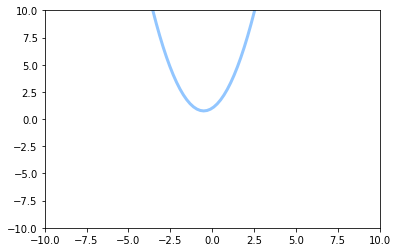

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
plt.style.use('seaborn-pastel')

from matplotlib import rc
rc('animation', html='jshtml')

#arguments for the functions
a = 1 #ax^2
b = 1 #bx
c = 1 #c
T = 10 * np.pi / 180 #light ray angle
n = 10 #number of light rays

# initializing plots
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
# initializing parabola
line1, = ax.plot([], [], lw=3)
#initialize lines
lines = [plt.plot([], [], lw=2)[0] for _ in range(n)] #lines to animate
'''
when initializing lines had to use the [0] index so that I assign only the line2D object, instead of the whole list
'''

def init():
  # parabola
  x = np.linspace(-10, 10, 100)
  y = a * (x ** 2) + b * x + c
  line1.set_data(x, y)
  return line1,
  #init lines
  for line in lines:
    line.set_data([], [])
    return line

def animate(i):
  #animate lines
  for j,line in enumerate(lines):
    y = np.linspace(5,6,100) - (i * 0.1)
    x = (y / np.tan((3 * np.pi / 2) + T)) + (-n/4 + j/2)
    line.set_data(x, y)
  return line,
  '''
  when using a for loop with multiple variables to iterate (j,line), this for loop iterates through the enumerated index and the line2D object
  0, line2D -> 1, line2D -> 2, line2D ...
  i is the loop for the animation function
  j is the loop for the multiple lines
  add comma for return (line,) to make the return function iterable
  '''

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=20, blit=True)
plt.show()
anim

#Final Code

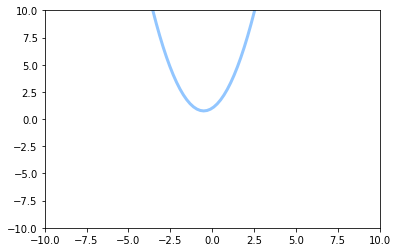

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
plt.style.use('seaborn-pastel')

from matplotlib import rc
rc('animation', html='jshtml')

#arguments for the functions
a = 1 #ax^2
b = 1 #bx
c = 1 #c
T = 10 * np.pi / 180 #light ray angle
n = 10 #number of light rays

# initializing plots
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
# initializing parabola
line1, = ax.plot([], [], lw=3)
#initialize lines
lines = [plt.plot([], [], lw=2)[0] for _ in range(n)] #lines to animate
'''
when initializing lines had to use the [0] index so that I assign only the line2D object, instead of the whole list
'''

def init():
  # parabola
  x = np.linspace(-10, 10, 100)
  y = a * (x ** 2) + b * x + c
  line1.set_data(x, y)
  return line1,
  #init lines
  for line in lines:
    line.set_data([], [])
    return line

#global params for each line
f = []
g = []
for item in range(n):
  f.append(0)
  g.append(0)

def animate(i):
  #animate lines
  for j,line in enumerate(lines):
    # rays of light
    y = np.linspace(5,6,100) - (i * 0.1)
    x = (y / np.tan((3 * np.pi / 2) + T)) + (-n/4 + j/2)
    # parabola boundaries
    m = min(y)
    d = (m / np.tan((3 * np.pi / 2) + T)) + (-n/4 + j/2)
    p = a * (d ** 2) + b * d + c
    # collision check
    if m >= p:
      f.pop(j)
      f.insert(j, m)
      g.pop(j)
      g.insert(j, d)
      line.set_data(x, y)
    else:
      ###linspace dynamic length (same length of 1)
      ###(x +, x - [determine direction])
      if T > 0:
        if (-b / 2 * a) >= g[j]:
          w = np.linspace(g[j], g[j]-1, 100) + (i * 0.1)
          z = (-1 * (1 / (np.tan(2 * (np.arctan(-1 * ((2 * a * f[j]) + b)) + T)))) * (w - g[j])) + f[j]
        elif (-b / 2 * a) < g[j]:
          w = np.linspace(g[j], g[j]+1, 100) - (i * 0.1)
          z = (-1 * (1 / (np.tan(2 * (np.arctan(-1 * ((2 * a * f[j]) + b)) - T)))) * (w - g[j])) + f[j]
      elif T < 0:
        if (-b / 2 * a) <= g[j]:
          w = np.linspace(g[j], g[j]+1, 100) - (i * 0.1)
          z = (-1 * (1 / (np.tan(2 * (np.arctan(-1 * ((2 * a * f[j]) + b)) + T)))) * (w - g[j])) + f[j]
        elif (-b / 2 * a) > g[j]:
          w = np.linspace(g[j], g[j]-1, 100) + (i * 0.1)
          z = (-1 * (1 / (np.tan(2 * (np.arctan(-1 * ((2 * a * f[j]) + b)) - T)))) * (w - g[j])) + f[j]
      else:
        if (-b / 2 * a) < g[j]:
          w = np.linspace(g[j], g[j]+1, 100) - (i * 0.1)
          z = (-1 * (1 / (np.tan(2 * (np.arctan(-1 * ((2 * a * f[j]) + b)) + T)))) * (w - g[j])) + f[j]
        elif (-b / 2 * a) > g[j]:
          w = np.linspace(g[j], g[j]-1, 100) + (i * 0.1)
          z = ((1 / (np.tan(2 * (np.arctan(-1 * ((2 * a * f[j]) + b)) + T)))) * (w - g[j])) + f[j]
        else:
          w = (-b / 2 * a)
          z = np.linspace(f[j], f[j]+1, 100) + (i * 0.1)
      line.set_data(w, z)
  return line,
  '''
  when using a for loop with multiple variables to iterate (j,line), this for loop iterates through the enumerated index and the line2D object
  0, line2D -> 1, line2D -> 2, line2D ...
  i is the loop for the animation function
  j is the loop for the multiple lines
  add comma for return (line,) to make the return function iterable
  '''

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=20, blit=True)
plt.show()
anim

##Test with collisions

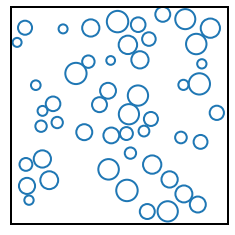

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib import animation
from itertools import combinations

class Particle:
    """A class representing a two-dimensional particle."""

    def __init__(self, x, y, vx, vy, radius=0.01, styles=None):
        """Initialize the particle's position, velocity, and radius.

        Any key-value pairs passed in the styles dictionary will be passed
        as arguments to Matplotlib's Circle patch constructor.

        """

        self.r = np.array((x, y))
        self.v = np.array((vx, vy))
        self.radius = radius

        self.styles = styles
        if not self.styles:
            # Default circle styles
            self.styles = {'edgecolor': 'b', 'fill': False}

    # For convenience, map the components of the particle's position and
    # velocity vector onto the attributes x, y, vx and vy.
    @property
    def x(self):
        return self.r[0]
    @x.setter
    def x(self, value):
        self.r[0] = value
    @property
    def y(self):
        return self.r[1]
    @y.setter
    def y(self, value):
        self.r[1] = value
    @property
    def vx(self):
        return self.v[0]
    @vx.setter
    def vx(self, value):
        self.v[0] = value
    @property
    def vy(self):
        return self.v[1]
    @vy.setter
    def vy(self, value):
        self.v[1] = value

    def overlaps(self, other):
        """Does the circle of this Particle overlap that of other?"""

        return np.hypot(*(self.r - other.r)) < self.radius + other.radius

    def draw(self, ax):
        """Add this Particle's Circle patch to the Matplotlib Axes ax."""

        circle = Circle(xy=self.r, radius=self.radius, **self.styles)
        ax.add_patch(circle)
        return circle

    def advance(self, dt):
        """Advance the Particle's position forward in time by dt."""

        self.r += self.v * dt

        # Make the Particles bounce off the walls
        if self.x - self.radius < 0:
            self.x = self.radius
            self.vx = -self.vx
        if self.x + self.radius > 1:
            self.x = 1-self.radius
            self.vx = -self.vx
        if self.y - self.radius < 0:
            self.y = self.radius
            self.vy = -self.vy
        if self.y + self.radius > 1:
            self.y = 1-self.radius
            self.vy = -self.vy

class Simulation:
    """A class for a simple hard-circle molecular dynamics simulation.

    The simulation is carried out on a square domain: 0 <= x < 1, 0 <= y < 1.

    """

    def __init__(self, n, radius=0.01, styles=None):
        """Initialize the simulation with n Particles with radii radius.

        radius can be a single value or a sequence with n values.

        Any key-value pairs passed in the styles dictionary will be passed
        as arguments to Matplotlib's Circle patch constructor when drawing
        the Particles.

        """

        self.init_particles(n, radius, styles)

    def init_particles(self, n, radius, styles=None):
        """Initialize the n Particles of the simulation.

        Positions and velocities are chosen randomly; radius can be a single
        value or a sequence with n values.

        """

        try:
            iterator = iter(radius)
            assert n == len(radius)
        except TypeError:
            # r isn't iterable: turn it into a generator that returns the
            # same value n times.
            def r_gen(n, radius):
                for i in range(n):
                    yield radius
            radius = r_gen(n, radius)

        self.n = n
        self.particles = []
        for i, rad in enumerate(radius):
            # Try to find a random initial position for this particle.
            while True:
                # Choose x, y so that the Particle is entirely inside the
                # domain of the simulation.
                x, y = rad + (1 - 2*rad) * np.random.random(2)
                # Choose a random velocity (within some reasonable range of
                # values) for the Particle.
                vr = 0.1 * np.random.random() + 0.05
                vphi = 2*np.pi * np.random.random()
                vx, vy = vr * np.cos(vphi), vr * np.sin(vphi)
                particle = Particle(x, y, vx, vy, rad, styles)
                # Check that the Particle doesn't overlap one that's already
                # been placed.
                for p2 in self.particles:
                    if p2.overlaps(particle):
                        break
                else:
                    self.particles.append(particle)
                    break

    def handle_collisions(self):
        """Detect and handle any collisions between the Particles.

        When two Particles collide, they do so elastically: their velocities
        change such that both energy and momentum are conserved.

        """

        def change_velocities(p1, p2):
            """
            Particles p1 and p2 have collided elastically: update their
            velocities.

            """

            m1, m2 = p1.radius**2, p2.radius**2
            M = m1 + m2
            r1, r2 = p1.r, p2.r
            d = np.linalg.norm(r1 - r2)**2
            v1, v2 = p1.v, p2.v
            u1 = v1 - 2*m2 / M * np.dot(v1-v2, r1-r2) / d * (r1 - r2)
            u2 = v2 - 2*m1 / M * np.dot(v2-v1, r2-r1) / d * (r2 - r1)
            p1.v = u1
            p2.v = u2

        # We're going to need a sequence of all of the pairs of particles when
        # we are detecting collisions. combinations generates pairs of indexes
        # into the self.particles list of Particles on the fly.
        pairs = combinations(range(self.n), 2)
        for i,j in pairs:
            if self.particles[i].overlaps(self.particles[j]):
                change_velocities(self.particles[i], self.particles[j])

    def advance_animation(self, dt):
        """Advance the animation by dt, returning the updated Circles list."""

        for i, p in enumerate(self.particles):
            p.advance(dt)
            self.circles[i].center = p.r
        self.handle_collisions()
        return self.circles

    def advance(self, dt):
        """Advance the animation by dt."""
        for i, p in enumerate(self.particles):
            p.advance(dt)
        self.handle_collisions()

    def init(self):
        """Initialize the Matplotlib animation."""

        self.circles = []
        for particle in self.particles:
            self.circles.append(particle.draw(self.ax))
        return self.circles

    def animate(self, i):
        """The function passed to Matplotlib's FuncAnimation routine."""

        self.advance_animation(0.01)
        return self.circles

    def do_animation(self, save=False):
        """Set up and carry out the animation of the molecular dynamics.

        To save the animation as a MP4 movie, set save=True.
        """

        fig, self.ax = plt.subplots()
        for s in ['top','bottom','left','right']:
            self.ax.spines[s].set_linewidth(2)
        self.ax.set_aspect('equal', 'box')
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 1)
        self.ax.xaxis.set_ticks([])
        self.ax.yaxis.set_ticks([])
        anim = animation.FuncAnimation(fig, self.animate, init_func=self.init,
                               frames=800, interval=2, blit=True)
        if save:
            Writer = animation.writers['ffmpeg']
            writer = Writer(fps=100, bitrate=1800)
            anim.save('collision.mp4', writer=writer)
        else:
            plt.show()


if __name__ == '__main__':
    nparticles = 50
    radii = np.random.random(nparticles)*0.03+0.02
    styles = {'edgecolor': 'C0', 'linewidth': 2, 'fill': None}
    sim = Simulation(nparticles, radii, styles)
    sim.do_animation(save=False)